In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as pt
from sklearn.linear_model import LinearRegression

In [2]:
data = {'LOAD (N)' : [0,6310,12600,18800,25100,31300,37900,40100,41600,46200,52400,58500,65400,69000,67800,65000,61500],
        
        'ELONGATION (mm)' : [0,0.010,0.020,0.030,0.040,0.050,0.060,0.163,0.433,1.25,2.50,4.50,7.50,12.50,15.50,20.00,21.00] 
       }
df=pd.DataFrame(data , columns=['LOAD (N)','ELONGATION (mm)'])

In [3]:
import math
Diameter = 14   #in mm
Area = math.pi*(Diameter**2)/4
Area
STRESS = df['LOAD (N)']/Area

In [4]:
df1 = pd.DataFrame(STRESS)
df2 = df1.rename(columns={'LOAD (N)':'STRESS (MPa)'})
df5 = df.join(df2, lsuffix = '',rsuffix = '')

In [5]:
original_length = 50     # in mm
Strain = df['ELONGATION (mm)']/original_length

In [6]:
df3 = pd.DataFrame(Strain)
df4 = df3.rename(columns={'ELONGATION (mm)':'STRAIN'})
df6 = df5.join(df4, lsuffix = '',rsuffix = '')
df6

,LOAD (N),ELONGATION (mm),STRESS (MPa),STRAIN
0,0,0.000,0.000000,0.00000
1,6310,0.010,40.990518,0.00020
2,12600,0.020,81.851114,0.00040
3,18800,0.030,122.127058,0.00060
4,25100,0.040,163.052615,0.00080
5,31300,0.050,203.328560,0.00100
6,37900,0.060,246.202953,0.00120
7,40100,0.163,260.494417,0.00326
8,41600,0.433,270.238597,0.00866
9,46200,1.250,300.120750,0.02500


In [7]:
x = df6['STRAIN']
y = df6['STRESS (MPa)']

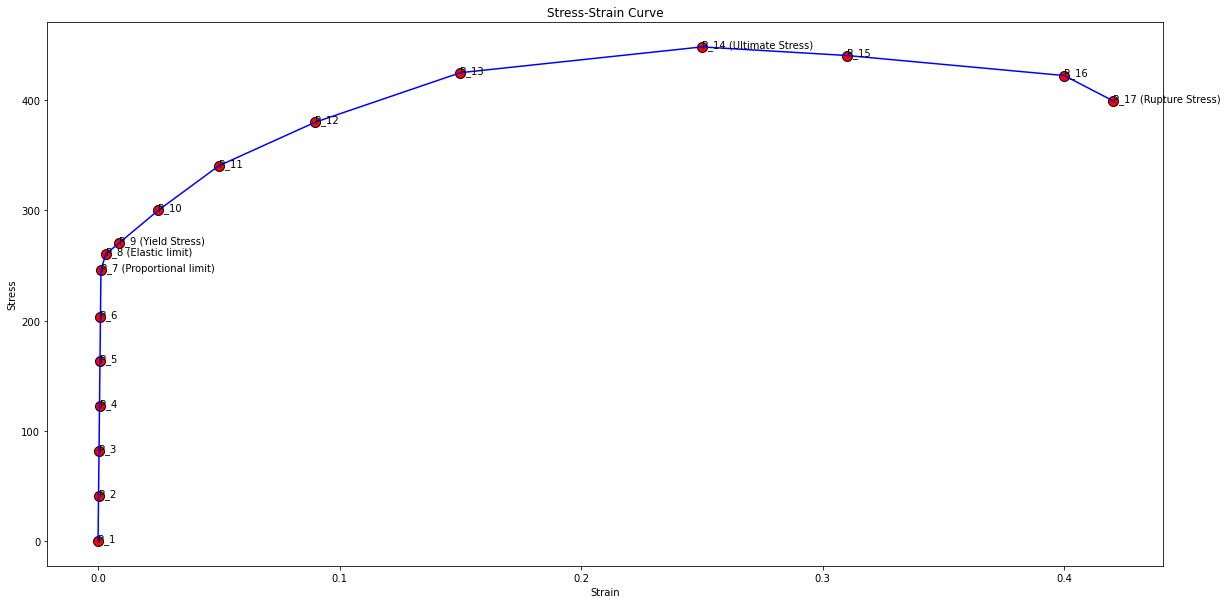

In [8]:
annotations=["P_1","P_2","P_3","P_4","P_5","P_6","P_7 (Proportional limit)",
             "P_8 (Elastic limit)","P_9 (Yield Stress)","P_10","P_11","P_12",
             "P_13","P_14 (Ultimate Stress)","P_15","P_16","P_17 (Rupture Stress)"]
pt.figure(figsize=(20,10))
pt.scatter(x,y,color = 'red',s=100,edgecolors='Black',label = 'True Position')
pt.plot(x,y,color = 'Blue')
pt.title('Stress-Strain Curve')
pt.xlabel('Strain')
pt.ylabel('Stress')

for i, label in enumerate(annotations):
    pt.text(x[i], y[i],label)

In [9]:
df7 = df6.head(7)

In [10]:
x1=df7['STRAIN']
y1=df7['STRESS (MPa)']

Text(0, 0.5, 'Stress')

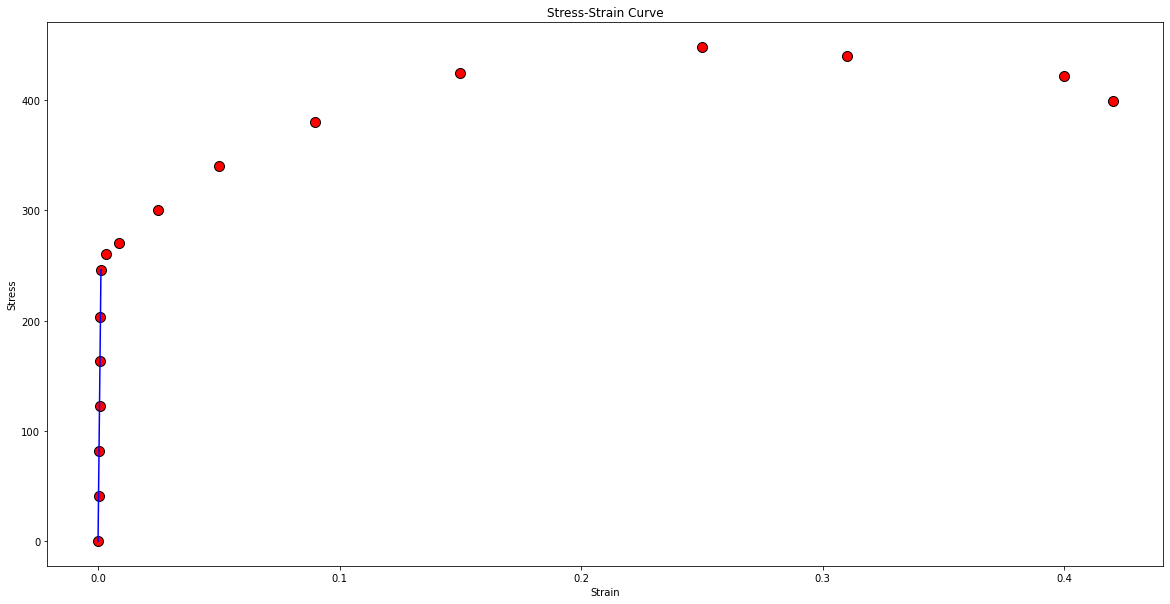

In [11]:
pt.figure(figsize=(20,10))
pt.scatter(x,y,color = 'red',s=100,edgecolors='Black',label = 'True Position')
pt.plot(x1,y1,color = 'Blue')
pt.title('Stress-Strain Curve')
pt.xlabel('Strain')
pt.ylabel('Stress')

Text(0, 0.5, 'Stress')

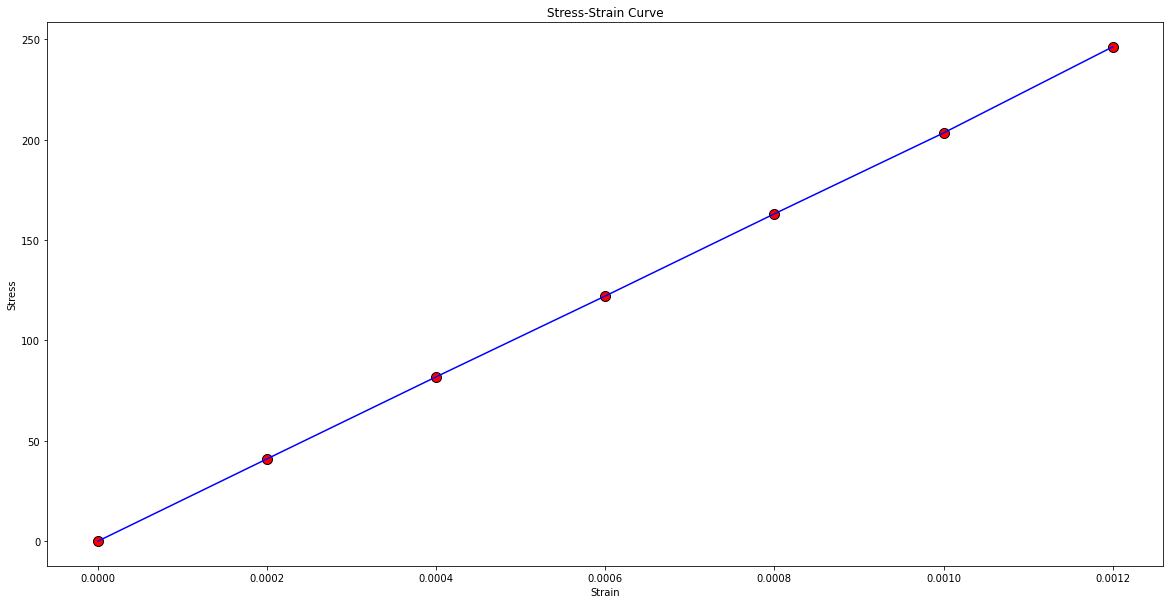

In [12]:
x1 = nm.array(x1)
y1 = nm.array(y1)
x1=x1.reshape(-1,1)
y1=y1.reshape(-1,1)
pt.figure(figsize=(20,10))
pt.scatter(x1,y1,color = 'red',s=100,edgecolors='Black',label = 'True Position')
pt.plot(x1,y1,color = 'Blue')
pt.title('Stress-Strain Curve')
pt.xlabel('Strain')
pt.ylabel('Stress')

In [13]:
ls=LinearRegression()
eqn = ls.fit(x1,y1)

In [14]:
eqn.coef_

array([[204372.57925605]])

In [15]:
pl = df6.iloc[6,2]
eom = float(eqn.coef_)
yield_stress = df6.iloc[8,2]
ultimate_stress = df6.iloc[13,2]
rupture_stress = df6.iloc[16,2]

In [16]:
data1 = { 'Mechanical Properties' : ['Proportional limit (MPa)','Modulus of elastcityn (MPa)',
          'Yield Stress (MPa)','Ultimate Stress (MPa)','Rupture Stress (MPa)'],
          'Values' : [pl, eom, yield_stress, ultimate_stress, rupture_stress]
        }
d8 = pd.DataFrame(data1,columns = ['Mechanical Properties','Values'])
d8.set_index(['Mechanical Properties'])

,Values
Mechanical Properties,
Proportional limit (MPa),246.202953
Modulus of elastcityn (MPa),204372.579256
Yield Stress (MPa),270.238597
Ultimate Stress (MPa),448.232289
Rupture Stress (MPa),399.511388
